<a href="https://colab.research.google.com/github/ashwinigit123/DataMining/blob/main/Trale_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1755]:
import numpy as np
data_points = [];
for i in range(20):
  X = np.random.uniform(low=0.0,high=1.0);
  N = np.random.normal();
  Y= np.sin(2*np.pi*X)+ 0.1 *N;
  data_points.append([X,Y]);

train_set = np.array(data_points[:10]);
test_set = np.array(data_points[10:]);

x_train = np.array(train_set[:10,:1])
y_train = np.array(train_set[:10,1:2])

x_test = np.array(test_set[:10,:1])
y_test = np.array(test_set[:10,1:2])


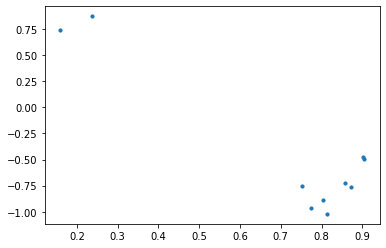

In [1756]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train, s=10)
plt.show()

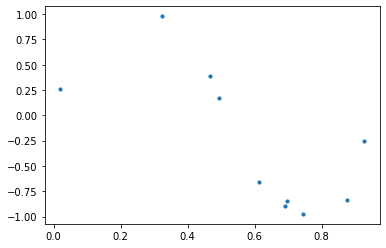

In [1757]:
plt.scatter(x_test,y_test, s=10)
plt.show()

In [1758]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomialRegressionWithDegree(i,x_test,y_train,x_train):
  polyf= PolynomialFeatures(degree=i)
  x_poly_train = polyf.fit_transform(x_train.reshape(-1, 1))
  x_poly_test = polyf.fit_transform(x_test.reshape(-1, 1))

  model = LinearRegression()
  model.fit(x_poly_train, y_train)
  y_poly_pred = model.predict(x_poly_test)

  rootmeansqerr = np.sqrt(mean_squared_error(y_test,y_poly_pred))
  r2 = r2_score(y_test,y_poly_pred)
  return polyf,model;
  

In [1759]:
poly_deg0,model_deg0 = polynomialRegressionWithDegree(0,x_test,y_train,x_train)


In [1760]:
poly_deg1,model_deg1 = polynomialRegressionWithDegree(1,x_test,y_train,x_train)

In [1761]:
poly_deg3,model_deg3 = polynomialRegressionWithDegree(3,x_test,y_train,x_train)

In [1762]:
poly_deg9,model_deg9 = polynomialRegressionWithDegree(9,x_test,y_train,x_train)

In [1763]:
labels = ['w0*', 'w1*', 'w2*','w3*','w4*','w5*','w6*','w7*','w8*','w9*']
weight_0 = model_deg0.coef_;
weight_1 = model_deg1.coef_;
weight_3 = model_deg3.coef_;
weight_9 = model_deg9.coef_;

w0 = weight_0.copy()
w1 = weight_1.copy()
w3 = weight_3.copy()
w9 = weight_9.copy()


w0.resize(10, refcheck=False)
w1.resize(10, refcheck=False)
w3.resize(10, refcheck=False)
w9.resize(10, refcheck=False)

w0 = np.around(w0,3);
w1 = np.around(w1,3);
w3 = np.around(w3,3);
w9 = np.around(w9,3);


titles = ['Weights', 'M=0', 'M=1', 'M=3', 'M=9']
data = [titles] + list(zip(labels, w0, w1, w3,w9))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(12) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

Weights     |M=0         |M=1         |M=3         |M=9         
----------------------------------------------------------------
w0*         |0.0         |0.0         |0.0         |0.0         
w1*         |0.0         |-2.269      |14.48       |-262887826.529
w2*         |0.0         |0.0         |-38.474     |2018735664.272
w3*         |0.0         |0.0         |25.095      |-8375305258.519
w4*         |0.0         |0.0         |0.0         |21061218792.133
w5*         |0.0         |0.0         |0.0         |-33749717856.715
w6*         |0.0         |0.0         |0.0         |34804630908.364
w7*         |0.0         |0.0         |0.0         |-22432114799.095
w8*         |0.0         |0.0         |0.0         |8241976655.572
w9*         |0.0         |0.0         |0.0         |-1320426964.885


In [1764]:
def plotGrphs(poly,model):

  x = np.linspace(0,1,100)
  x_poly = poly.fit_transform(x.reshape(x.shape[0],1))
  y = model.predict(x_poly)
  plt.plot(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.scatter(x_train, y_train, c='b')
  plt.scatter(x_test, y_test, c = 'r')
  plt.show()

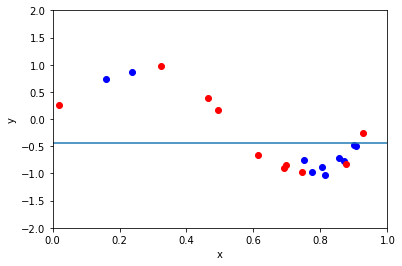

In [1765]:
plotGrphs(poly_deg0,model_deg0)

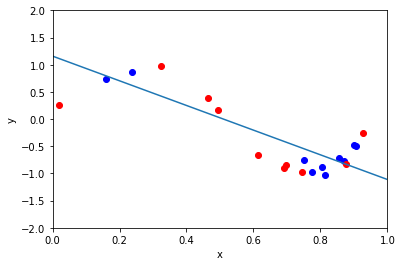

In [1766]:
plotGrphs(poly_deg1,model_deg1)

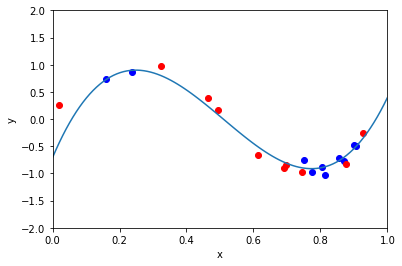

In [1767]:
plotGrphs(poly_deg3,model_deg3)

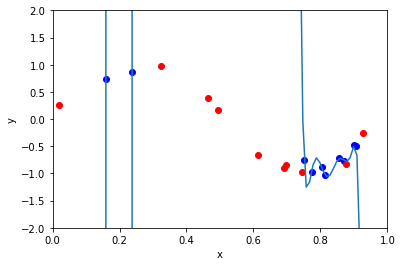

In [1768]:
plotGrphs(poly_deg9,model_deg9)

In [1769]:
train_error = ();
test_error = ();
for i in range(10):
  #print (i);
  polyf= PolynomialFeatures(degree=i)
  x_poly_train = polyf.fit_transform(x_train.reshape(-1, 1))
  x_poly_test = polyf.fit_transform(x_test.reshape(-1, 1))

  model = LinearRegression()
  model.fit(x_poly_train, y_train)
  y_poly_pred = model.predict(x_poly_test)
  y_poly_train = model.predict(x_poly_train);

  rootmeansqerr_test = np.sqrt(mean_squared_error(y_test,y_poly_pred))
  test_error=np.append(test_error,rootmeansqerr_test);
  rootmeansqerr_train = np.sqrt(mean_squared_error(y_train,y_poly_train))
  train_error = np.append(train_error,rootmeansqerr_train);


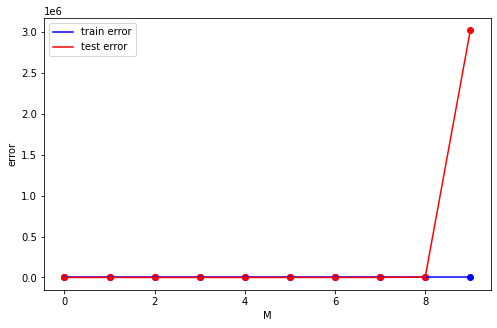

In [1770]:
deg = np.linspace(0, 9, 10)
plt.figure(figsize=(8, 5))
#plt.ylim([-5, 20])
plt.xlabel('M')
plt.ylabel('error')

plt.plot(deg, train_error, label = 'train error', color = 'blue')
plt.scatter(deg, train_error,marker='o', color = 'blue')
plt.plot(deg, test_error, label = 'test error', color = 'red')
plt.scatter(deg, test_error,marker='o', color = 'red')

plt.legend()

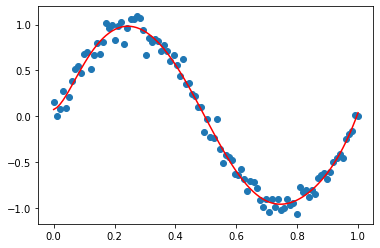

In [1771]:
x_100 = np.linspace(0,1,100)
N_100 = np.random.normal(size=100)
y_100 =2*3.14*x_100;
for i in range(100):
    y_100[i] = np.sin(y_100[i]) + N_100[i]*0.1
poly_feat = PolynomialFeatures(degree = 9)
x_100_poly = poly_feat.fit_transform(x_100.reshape(-1, 1))
model = LinearRegression()
model.fit(x_100_poly, y_100)
y_100_pred = model.predict(x_100_poly)
plt.plot(x_100, y_100_pred, c = 'r')
plt.scatter(x_100, y_100)
plt.show()

In [1772]:
from sklearn.linear_model import Ridge
def regulariseWeight(x,y,alpha):
  pf = PolynomialFeatures(degree=9);
  x_ploy_transform = pf.fit_transform(x.reshape(x.shape[0],1))
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(x_ploy_transform,y)
  return ridge_model.predict(x_ploy_transform)



In [1773]:
x_100_col = x_100.reshape(100,1)
y_100_col = y_100.reshape(100,1)
def plotForLamda(l):
  predict = regulariseWeight(x_100_col, y_100_col, l)
  plt.title('M = 9, Data = 100, lambda = %f' %l)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.scatter(x_100_col,y_100_col)
  plt.plot(sorted(x_100_col[:, 0]), predict[np.argsort(x_100_col[:, 0])], c = 'r')

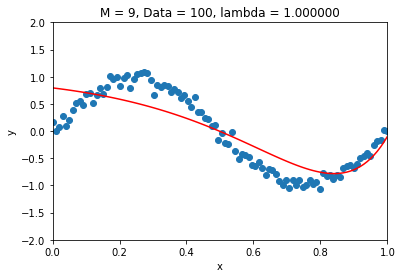

In [1774]:
plotForLamda(1)

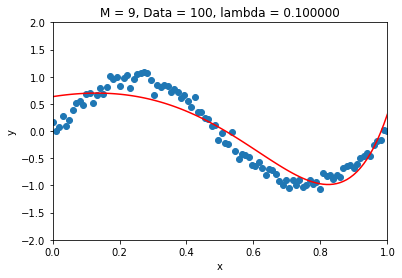

In [1775]:
plotForLamda(0.1)

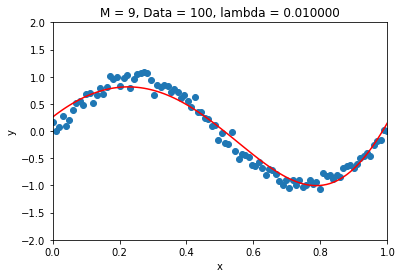

In [1776]:
plotForLamda(0.01)

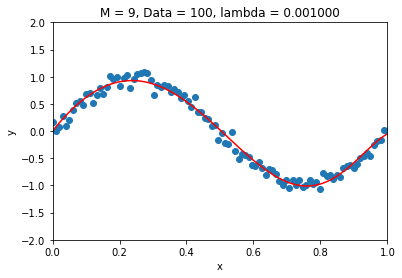

In [1777]:
plotForLamda(0.001)

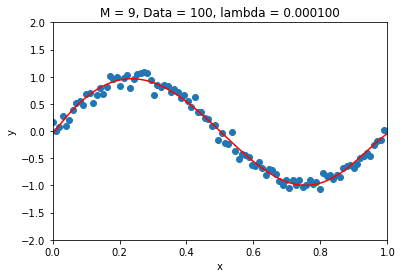

In [1778]:
plotForLamda(0.0001)

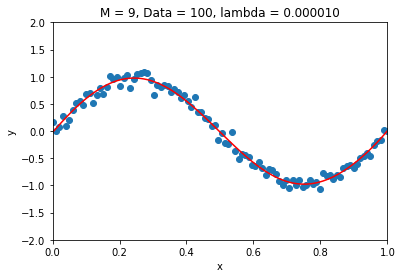

In [1779]:
plotForLamda(0.00001)

In [1780]:
lambda_list = [1, 1/10, 1/100,1/1000,1/10000,1/100000];
train_error_lambda = ();
test_error_lambda = ();
for i in range(len(lambda_list)):
  pf = PolynomialFeatures(degree=9);
  x_poly_transform_train = pf.fit_transform(x_train.reshape(-1, 1))
  x_poly_transform_test = pf.fit_transform(x_test.reshape(-1, 1))

  ridge_model = Ridge(alpha=lambda_list[i])
  ridge_model.fit(x_poly_transform_train, y_train)
  y_train_pred = ridge_model.predict(x_poly_transform_train)
  y_test_pred = ridge_model.predict(x_poly_transform_test)

  rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
  test_error_lambda=np.append(test_error_lambda,rmse_test);
  rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
  train_error_lambda = np.append(train_error_lambda,rmse_train);

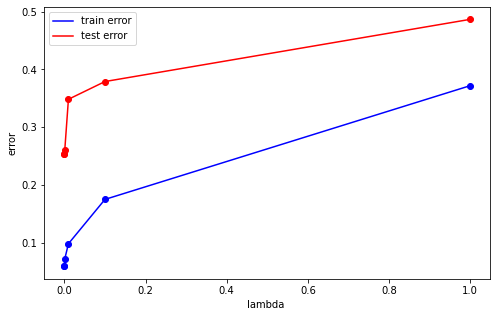

In [1781]:
plt.figure(figsize=(8, 5))
plt.xlabel('lambda ')
plt.ylabel('error')

plt.plot(lambda_list, train_error_lambda, label = 'train error', color = 'blue')
plt.scatter(lambda_list, train_error_lambda,marker='o', color = 'blue')
plt.plot(lambda_list, test_error_lambda, label = 'test error', color = 'red')
plt.scatter(lambda_list, test_error_lambda,marker='o', color = 'red')

plt.legend()